In [110]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [79]:
arr = np.array([4,2,6,5])

In [80]:
np.linalg.norm(arr)
iris = pd.read_csv("/home/darkstar/lang/python/practice/day8/Iris.csv")
X = iris.drop(['Species', 'Id'], axis = 1)
pcomp = PCA()

In [81]:
comps = pcomp.fit_transform(X)
print(comps.shape)

(150, 4)


In [86]:
comps = pd.DataFrame(comps, columns=['PC1','PC2','PC3','PC4'])
print(comps.var())
cov_mat = np.cov(X, rowvar=False)
values, vectors = np.linalg.eig(cov_mat)
print("eigen values \n", values)

PC1    4.224841
PC2    0.242244
PC3    0.078524
PC4    0.023683
dtype: float64
eigen values 
 [4.22484077 0.24224357 0.07852391 0.02368303]


In [87]:
print(pcomp.explained_variance_)
total_var = np.sum(pcomp.explained_variance_)
print("\n% age variation explained:")
print(pcomp.explained_variance_ratio_*100)

[4.22484077 0.24224357 0.07852391 0.02368303]

% age variation explained:
[92.46162072  5.30155679  1.71851395  0.51830855]


In [88]:
X_Red_PC = comps[['PC1', 'PC2']]
y = iris['Species']
X_Red_PC['Species'] = iris['Species'].values

/tmp/ipykernel_18315/751744467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Red_PC['Species'] = iris['Species'].values


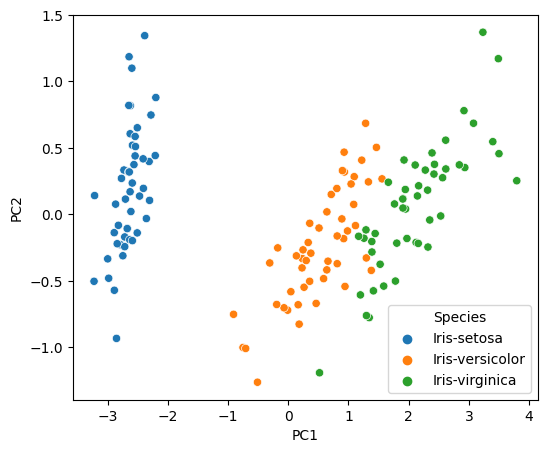

In [105]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=X_Red_PC, x='PC1', y='PC2', hue='Species')
plt.show()

In [90]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [96]:
X = iris.drop(['Species', 'Id'], axis = 1)
y=iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=23)

In [97]:
svm = SVC(probability=True, kernel='linear', random_state=23)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)
print(accuracy_score(y_test, y_pred))
print(log_loss(y_test, y_pred_prob))

0.9555555555555556
0.12805322606802894


In [98]:
X = X_Red_PC.drop('Species', axis = 1)
y=X_Red_PC['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=23)

In [106]:
svm = SVC(probability=True, kernel='linear', random_state=23)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred_prob = svm.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob))

0.9333333333333333
0.15662384058148338


In [113]:
milk = pd.read_csv("/home/darkstar/Documents/pg-dbda/module5_R-Programming/practice/day1/Datasets/milk.csv", index_col=0)
milk


,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [115]:
scaler = StandardScaler()
milk_scaled = scaler.fit_transform(milk)
milk_scaled = pd.DataFrame(milk_scaled, columns=['PC1','PC2','PC3','PC4','PC5'])

In [117]:
bank = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/cases/Bankruptcy/Bankruptcy.csv")
bank

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [118]:
X = bank.drop(['NO', 'YR', 'D'], axis = 1)
y = bank['D']
prcomp = PCA(n_components=0.95)


In [132]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
comps = prcomp.fit_transform(X_scaled)
print("\n% age variation explained:")
print(pcomp.explained_variance_ratio_*100)


% age variation explained:
[92.46162072  5.30155679  1.71851395  0.51830855]


In [130]:
cs = np.cumsum(prcomp.explained_variance_ratio_*100)
cs

array([37.11640465, 50.1820615 , 61.5149299 , 70.55147974, 77.69431031,
       82.26173186, 86.67352867, 90.533825  , 93.90205307, 95.92804815])

ValueError: x and y must be the same size

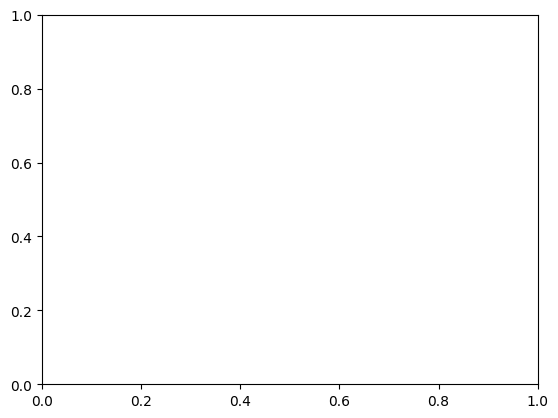

In [131]:
pcs = np.arange(1,25)
plt.scatter(x=pcs, y=cs)
plt.plot(pcs, cs)
plt.xlabel("PC's")
plt.ylabel("%age variation explained")
plt.show()